In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Principal Component Analysis (PCA)

In [4]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
df_wine.shape

(178, 14)

Splitting the data into 70% training and 30% test subsets.

In [13]:
from sklearn.model_selection import train_test_split

X, Y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [15]:
X_train.shape

(124, 13)

In [16]:
X_test.shape

(54, 13)

## PCA Step 1: Standardize Data

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [21]:
X_test_std

array([[ 0.94841977, -0.63042822, -0.4110476 , -0.87677804,  1.22679643,
         0.57147571,  0.95620726, -1.24682729,  0.01258759,  0.36299992,
        -0.15283642,  0.83141032,  1.01828164],
       [-0.24190464,  0.25288364,  0.42452457,  0.69400284,  0.81583896,
        -1.30214437, -0.62636631, -1.00437054, -0.59161664,  2.47674005,
        -2.02839981, -1.57358081, -0.86722119],
       [-0.76815332, -1.10741662, -0.73801062, -0.14748691, -0.89648384,
         2.07706327,  1.16173629, -1.40846512,  0.43217386, -0.23482557,
         1.1259568 ,  0.37265479, -1.06227321],
       [ 0.72288462, -0.57742951,  0.35186612,  0.27325796,  1.08981061,
         1.17371073,  0.83288984, -1.3276462 ,  1.40561401,  0.5338072 ,
         0.10292223,  0.59508171,  1.21333366],
       [ 0.08386836,  3.01764974, -0.8469983 ,  0.55375455, -0.96497675,
         0.60493321,  0.69929597, -0.51945706,  0.66714217, -1.02480926,
        -0.96273879,  0.69239349, -1.19230789],
       [-1.7830615 , -0.294769

## PCA Step 2: Find covariance matrix

In [22]:
cov_mat = np.cov(X_train_std.T)
print(cov_mat)

[[ 1.00813008  0.08797701  0.23066952 -0.32868099  0.2141631   0.35576761
   0.2991246  -0.16913744  0.09649074  0.56962271 -0.04781543  0.07403492
   0.63277882]
 [ 0.08797701  1.00813008  0.2016416   0.30658143 -0.06030917 -0.30124242
  -0.41221162  0.36616593 -0.19190146  0.30749173 -0.54992807 -0.39352761
  -0.20253906]
 [ 0.23066952  0.2016416   1.00813008  0.44971971  0.18321413  0.12235533
   0.06130256  0.18655693 -0.02607834  0.24555355 -0.10928021 -0.01820002
   0.15948032]
 [-0.32868099  0.30658143  0.44971971  1.00813008 -0.08930998 -0.37018442
  -0.41804463  0.40212108 -0.25765667 -0.03090225 -0.25313262 -0.28934372
  -0.48504311]
 [ 0.2141631  -0.06030917  0.18321413 -0.08930998  1.00813008  0.16513295
   0.14458703 -0.30763563  0.27228619  0.1260674   0.05792599  0.01596134
   0.31461066]
 [ 0.35576761 -0.30124242  0.12235533 -0.37018442  0.16513295  1.00813008
   0.88119961 -0.45396901  0.6196806  -0.06935051  0.45718802  0.72214462
   0.56326772]
 [ 0.2991246  -0.41221

In [24]:
cov_mat.shape

(13, 13)

## PCA Step 3: Compute Eigenvectors and Eigenvalues

In [28]:
eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)

In [30]:
eigen_vals

array([0.08414846, 0.16831254, 0.21432212, 0.2399553 , 0.29595018,
       0.33051429, 0.52251546, 0.60181514, 0.84906459, 1.01233462,
       1.42809973, 2.46635032, 4.8923083 ])

In [31]:
eigen_vecs.shape

(13, 13)

### Total and explained variance

In [32]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [33]:
cum_var_exp

array([0.37329648, 0.56148574, 0.67045365, 0.74769754, 0.81248349,
       0.85840362, 0.89827298, 0.92349212, 0.94607393, 0.96438317,
       0.98073654, 0.99357924, 1.        ])

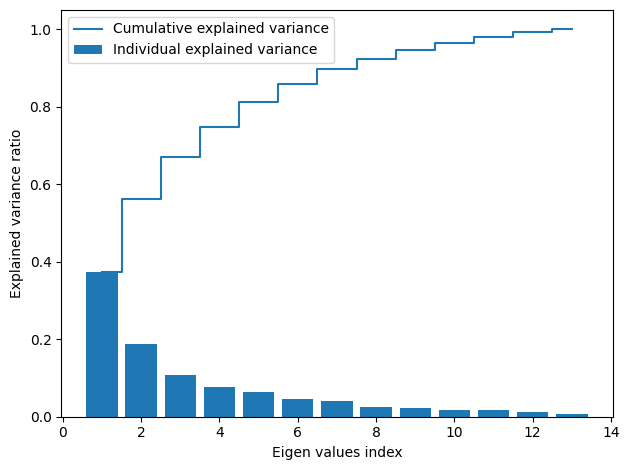

In [34]:
plt.bar(range(1, 14), var_exp, align='center',
        label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Eigen values index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## PCA Step 4: Select k Eigenvectors

In [35]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

In [36]:
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [38]:
W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', W)

Matrix W:
 [[-0.14669811  0.50417079]
 [ 0.24224554  0.24216889]
 [ 0.02993442  0.28698484]
 [ 0.25519002 -0.06468718]
 [-0.12079772  0.22995385]
 [-0.38934455  0.09363991]
 [-0.42326486  0.01088622]
 [ 0.30634956  0.01870216]
 [-0.30572219  0.03040352]
 [ 0.09869191  0.54527081]
 [-0.30032535 -0.27924322]
 [-0.36821154 -0.174365  ]
 [-0.29259713  0.36315461]]


## PCA Step 5: Compute the transformed data (k Principal Components)

In [39]:
X_train_pca = X_train_std.dot(W)

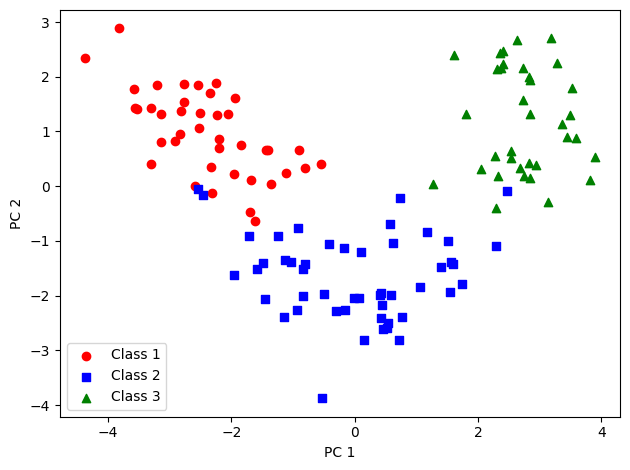

In [41]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(Y_train), colors, markers):
    plt.scatter(X_train_pca[Y_train == l, 0], 
                X_train_pca[Y_train == l, 1], 
                c=c, label=f'Class {l}', marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()